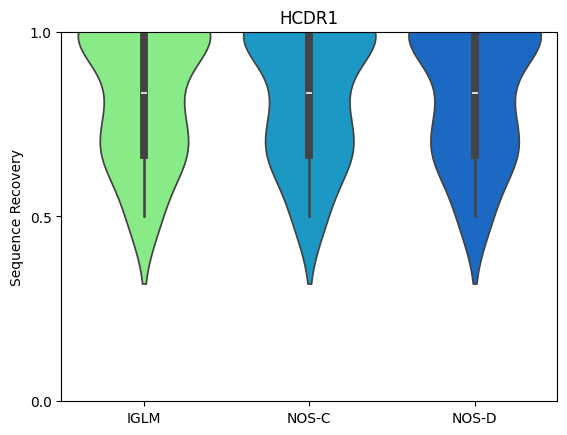

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_col(fn, sample_tag, col_name):
    df = pd.read_csv(fn)
    return df[df['sample_tag'] == sample_tag][col_name].values

sample = 'chothia_hcdr1'

iglm_fn = 'data/iglm_fixed_samples_labeled.csv'
iglm_data = get_col(iglm_fn, sample, 'seq_recovery')

nosc_fn = 'data/iglm_fixed_samples_labeled.csv'
nosc_data = get_col(nosc_fn, sample, 'seq_recovery')

nosd_fn = 'data/iglm_fixed_samples_labeled.csv'
nosd_data = get_col(nosd_fn, sample, 'seq_recovery')

data = {
    'IGLM': iglm_data,
    'NOS-C': nosc_data,
    'NOS-D': nosd_data
}

df = pd.DataFrame(data)
df = df.melt(var_name="HCDR1", value_name="SeqRecovery")

sns.violinplot(x='HCDR1', y='SeqRecovery', data=df, inner='box', label='NOS-C', palette=['#79FC77', '#00A5E1', '#0067E0'], hue='HCDR1')

max_seq_recov = max([np.max(d) for d in data.values()])
plt.ylim(top=max_seq_recov)
plt.title('HCDR1')
plt.xlabel('')
plt.ylabel('Sequence Recovery')
plt.yticks(np.linspace(0, 1, 3))
plt.show()